In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [2]:
img=cv2.imread("./images/shapes.jpg")
img_rgb=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
img_gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

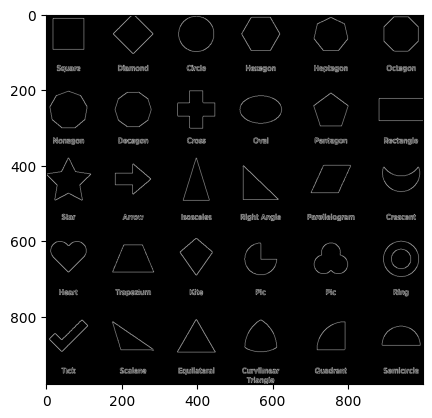

In [4]:
gray=cv2.Canny(img_gray,80,150)
plt.imshow(gray,cmap="grey")

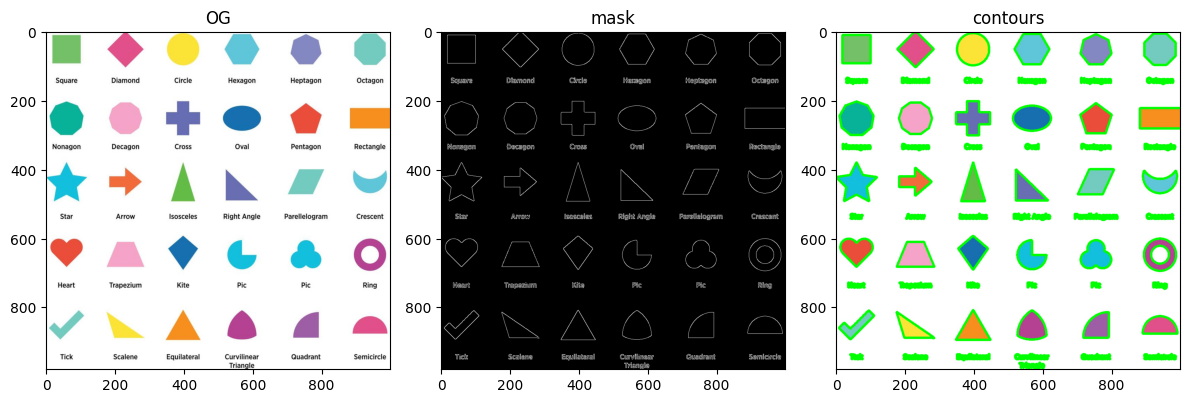

In [6]:
contours,hirarchy=cv2.findContours(gray,cv2.RETR_LIST,cv2.CHAIN_APPROX_SIMPLE)
contour_img=img_rgb.copy()
cv2.drawContours(contour_img,contours,-1,(0,255,0),5)

plt.figure(figsize=(12,6))
plt.subplot(1,3,1)
plt.imshow(img_rgb)
plt.title("OG")

plt.subplot(1,3,2)
plt.imshow(gray,cmap='grey')
plt.title("mask")

plt.subplot(1,3,3)
plt.imshow(contour_img)
plt.title("contours")
plt.tight_layout()
plt.show()

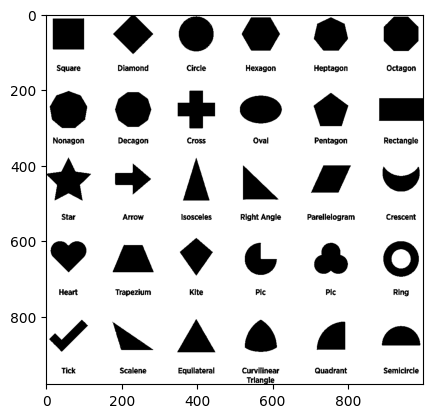

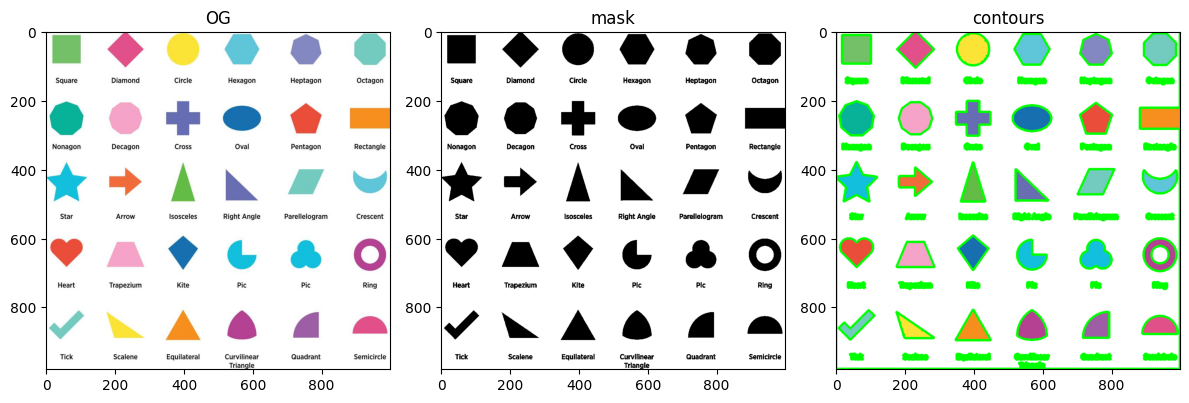

In [9]:
retval,binary=cv2.threshold(img_gray,220,255,cv2.THRESH_BINARY)
plt.imshow(binary,cmap="grey")
contours,hirarchy=cv2.findContours(binary,cv2.RETR_LIST,cv2.CHAIN_APPROX_SIMPLE)
contour_img=img_rgb.copy()
cv2.drawContours(contour_img,contours,-1,(0,255,0),5)

plt.figure(figsize=(12,6))
plt.subplot(1,3,1)
plt.imshow(img_rgb)
plt.title("OG")

plt.subplot(1,3,2)
plt.imshow(binary,cmap='grey')
plt.title("mask")

plt.subplot(1,3,3)
plt.imshow(contour_img)
plt.title("contours")
plt.tight_layout()
plt.show()


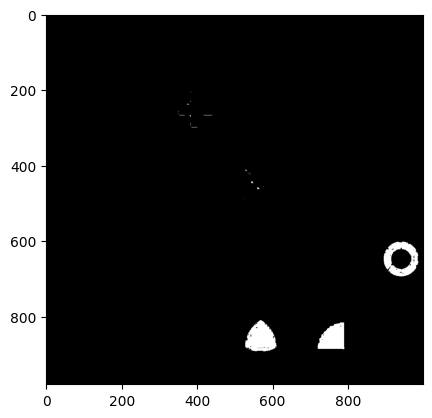

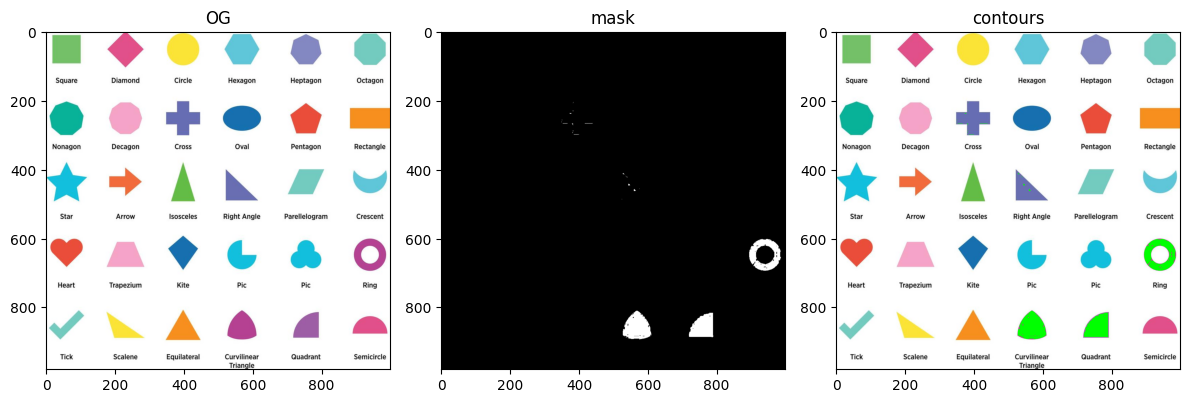

In [11]:
lower_bound=np.array([120,100,0],dtype=np.uint8)
higher_bound=np.array([160,185,200],dtype=np.uint8)

hsv_img=cv2.cvtColor(img,cv2.COLOR_BGR2HSV)
mask=cv2.inRange(hsv_img,lower_bound,higher_bound)
plt.imshow(mask,cmap='grey')

contours,hirarchy=cv2.findContours(mask,cv2.RETR_LIST,cv2.CHAIN_APPROX_SIMPLE)
contour_img=img_rgb.copy()
cv2.drawContours(contour_img,contours,-1,(0,255,0),-1)

plt.figure(figsize=(12,6))
plt.subplot(1,3,1)
plt.imshow(img_rgb)
plt.title("OG")

plt.subplot(1,3,2)
plt.imshow(mask,cmap='grey')
plt.title("mask")

plt.subplot(1,3,3)
plt.imshow(contour_img)
plt.title("contours")
plt.tight_layout()
plt.show()


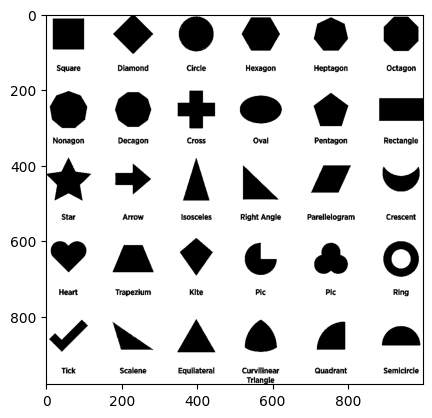

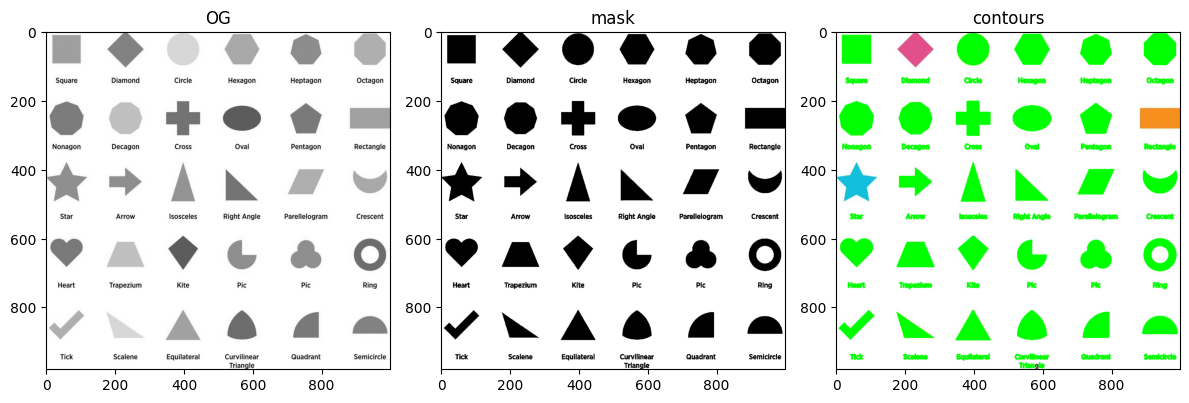

In [17]:
lower_bound=np.array([220],dtype=np.uint8)
higher_bound=np.array([255],dtype=np.uint8)

mask=cv2.inRange(img_gray,lower_bound,higher_bound)
plt.imshow(mask,cmap='grey')

contours,hirarchy=cv2.findContours(mask,cv2.RETR_LIST,cv2.CHAIN_APPROX_SIMPLE)
sorted_contours=sorted(contours,key=cv2.contourArea,reverse=True)
sorted_contours=sorted_contours[1:]
contour_img=img_rgb.copy()
cv2.drawContours(contour_img,sorted_contours,-1,(0,255,0),-1)

plt.figure(figsize=(12,6))
plt.subplot(1,3,1)
plt.imshow(img_gray,cmap='grey')
plt.title("OG")

plt.subplot(1,3,2)
plt.imshow(mask,cmap='grey')
plt.title("mask")

plt.subplot(1,3,3)
plt.imshow(contour_img)
plt.title("contours")
plt.tight_layout()
plt.show()

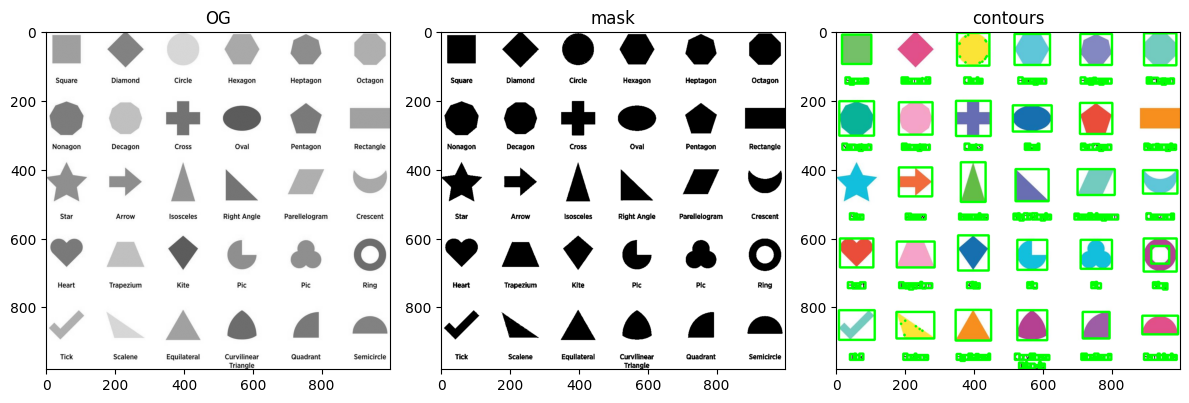

In [18]:
contour_img=img_rgb.copy()
for con in sorted_contours:
    x,y,w,h=cv2.boundingRect(con)
    cv2.rectangle(contour_img,(x,y),(x+w,y+h),(0,255,0),5)

plt.figure(figsize=(12,6))
plt.subplot(1,3,1)
plt.imshow(img_gray,cmap='grey')
plt.title("OG")

plt.subplot(1,3,2)
plt.imshow(mask,cmap='grey')
plt.title("mask")

plt.subplot(1,3,3)
plt.imshow(contour_img)
plt.title("contours")
plt.tight_layout()
plt.show()